In [17]:
import pandas as pd
import numpy as np
from sunpy.net import hek, hek2vso
from sunpy.time import TimeRange, parse_time
import astropy.units as u
import matplotlib.pyplot as plt

In [45]:
directory = '14Years'

In [46]:
cl = pd.read_csv(directory + '/classifications.csv', delimiter=';')
r = pd.read_csv(directory + '/rankings.csv', delimiter=';')
lp = pd.read_csv(directory + '/lookup_properties.csv', delimiter=';')
lt = pd.read_csv(directory + '/lookup_timesfits.csv', delimiter=';')

In [47]:
cl.head()

,#id,zooniverse_class,user_id,image_id_0,image_id_1,image0_more_complex_image1,used_inverted,date_created,date_started,date_finished
0,1,5399bb1ba5ae133a2b000191,1,193491,204622,0,0,2014-06-12 14:37:16,2014-06-12 14:37:11,2014-06-12 14:37:18
1,2,5399bc69a5ae133a2b0001b3,2,197554,196552,0,0,2014-06-12 14:42:49,2014-06-12 14:41:49,2014-06-12 14:42:53
2,3,5399bed47afd845ed0000293,3,174978,186075,1,1,2014-06-12 14:53:08,2014-06-12 14:52:48,2014-06-12 14:53:01
3,4,5399bee17afd8467ef0001d9,3,168696,169558,0,1,2014-06-12 14:53:21,2014-06-12 14:53:01,2014-06-12 14:53:13
4,5,5399bee67afd8467ef0001db,3,172245,197297,1,1,2014-06-12 14:53:26,2014-06-12 14:53:13,2014-06-12 14:53:19


In [48]:
r.head()

,#id,image_id,count,k_value,score,std_dev
0,1,36136,50,8,923.812415,2.612478
1,2,37104,50,8,943.778154,2.289780
2,3,189853,50,8,943.936408,2.076371
3,4,82230,50,8,944.762717,2.423050
4,5,9170,50,8,945.611183,2.091108


In [49]:
lp.head()

,#id,filename,zooniverse_id,area,areafrac,areathesh,arid,bipolesep,bmax,c1flr12hr,...,posstatus,pslcurvature,psllength,pxpos_x,pxpos_y,pxscl_hpc2stg,rvalue,sszn,sszstatus,wlsg
0,1,5397a56aa57caf04c6000001.jpg,ASZ0004sgf,8797.8,0.7174,NaN,1,30.2691,1638.00,0,...,7,0.0,24.1723,203.71601,480.74146,0.0,8879.9,1,1,9006.000
1,2,5397a56ba57caf04c6000003.jpg,ASZ0004sge,1071.0,-0.0696,NaN,1,14.9390,828.11,0,...,7,0.0,0.9591,384.94369,646.17244,0.0,1095.0,2,1,219.130
2,3,5397a56ba57caf04c6000005.jpg,ASZ0004sgd,1492.5,-0.0391,NaN,1,17.4627,1016.30,0,...,7,0.0,0.0000,393.85443,647.23820,0.0,1544.0,3,1,50.035
3,4,5397a56ba57caf04c6000007.jpg,ASZ0004sgc,1192.9,0.2713,NaN,1,33.6636,616.73,0,...,7,0.0,0.0000,436.38598,646.59715,0.0,1279.0,4,1,0.000
4,5,5397a56ba57caf04c6000009.jpg,ASZ0004sgb,3593.6,-0.0104,NaN,1,26.3084,1131.70,0,...,7,0.0,3.8100,440.64068,646.23247,0.0,3788.0,5,1,2380.300


In [50]:
lt.head()

,#id,filename,obs_date
0,1,fd_M_96m_01d.1218.0000.fits,1996-05-02 23:28:04
1,2,fd_M_96m_01d.1220.0012.fits,1996-05-05 18:39:04
2,3,fd_M_96m_01d.1220.0013.fits,1996-05-05 20:15:04
3,4,fd_M_96m_01d.1221.0003.fits,1996-05-06 04:15:04
4,5,fd_M_96m_01d.1221.0004.fits,1996-05-06 05:51:04


In [51]:
rNlp = pd.merge(r, lp, how='inner', left_on='image_id', right_on='#id')
rNlp.head()

,#id_x,image_id,count,k_value,score,std_dev,#id_y,filename,zooniverse_id,area,...,posstatus,pslcurvature,psllength,pxpos_x,pxpos_y,pxscl_hpc2stg,rvalue,sszn,sszstatus,wlsg
0,1,36136,50,8,923.812415,2.612478,36136,5397a87ba57caf04c6011a4f.jpg,ASZ00040kt,210.28,...,7,0.0,0.0,606.61015,565.96012,0.0,206.0,36136,6,0.0
1,2,37104,50,8,943.778154,2.289780,37104,5397a88fa57caf04c60121df.jpg,ASZ0003ztx,257.18,...,7,0.0,0.0,527.71175,203.74150,0.0,467.0,37104,6,0.0
2,3,189853,50,8,943.936408,2.076371,189853,5397b5aea57caf04c605cb39.jpg,ASZ0000q35,224.44,...,7,0.0,0.0,265.97985,413.29587,0.0,224.0,189853,6,0.0
3,4,82230,50,8,944.762717,2.423050,82230,5397ac75a57caf04c602826b.jpg,ASZ000310f,126.60,...,7,0.0,0.0,453.79630,750.30443,0.0,175.0,82230,6,0.0
4,5,9170,50,8,945.611183,2.091108,9170,5397a632a57caf04c60047a3.jpg,ASZ0004ldu,3267.60,...,7,0.0,0.0,729.65146,743.65800,0.0,3630.0,9170,1,0.0


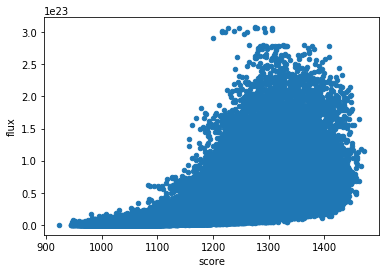

In [52]:
rNlp.plot(x='score', y='flux', kind='scatter')
#plot shows that score is related to the magnetic activity